In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
data = pd.read_csv("/home/anatol/course/machine-learning-ex2/ex2/ex2data2.txt",
                   names=['microchiptest1','microchiptest2','goodorbad'],header = None)
x1 = data['microchiptest1'].to_numpy(np.float32)
x2 = data['microchiptest2'].to_numpy(np.float32)
y = data['goodorbad'].to_numpy(np.float32)
x1 = x1.reshape(x1.shape[0],1)
x2 = x2.reshape(x1.shape[0],1)
y= y.reshape(x1.shape[0],1)


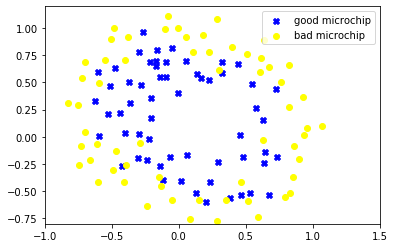

In [2]:
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.scatter(x1[pos],x2[pos],label = 'good microchip', marker = 'X',
           color = 'blue')
plt.scatter(x1[neg],x2[neg],label = 'bad microchip', marker = 'o',
           color = 'yellow')
plt.xlim(-1,1.5)
plt.ylim(-0.8,1.2)
plt.legend()
plt.show()

In [3]:
##feature mapping
def mapFeature(x1,x2,degree):
    x1 = x1.reshape(-1,1)
    output = np.ones((x1.shape[0],1))
    for i in range(degree+1)[1:]:
        
        for j in range(i+1):
            
            val = np.zeros((x1.shape[0],1))
            val = ((x1**(i-j))*(x2**j))
            output = np.hstack((output,val))
            
    return output
            
            
X = mapFeature(x1,x2,6)  
X.shape
         


(118, 28)

In [4]:
theta = np.zeros((X.shape[1],1))
test_theta = np.ones((X.shape[1],1))
laambda = 1
def costfunction(X,y,theta,laambda):
    m = X.shape[0]  
    h = 1/(1+np.exp(-X @ theta))
    J = 1/m*(np.sum(-(y * np.log(h) + (1 - y) * np.log(1-h))))+laambda/(2*m) * np.sum(theta[1:,0]**2)
    
    
        
    return J
def gradient(X,y,theta,laambda):
    n = X.shape[1]
    grad = np.zeros((n,1))
    m = X.shape[0]
    h = 1/(1+np.exp(-X @ theta))
    grad[0,0] = 1/m*(X[:,0] @ (h - y))
    for i in range (n)[1:]:
        grad[i,0] = (1/m*(X[:,i] @ (h - y))) + laambda/(m)*theta[i]
        
    return grad
J_with_thetazero = costfunction(X,y,theta,laambda)#expected 0.693 
grad_with_thetazero = gradient(X,y,theta,laambda) #expected 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\
J_with_thetaones = costfunction(X,y,test_theta,10) #expected 3.16
grad_with_thetaones = gradient(X,y,test_theta,10)#expected 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922

#print(J_with_thetazero)
#print(grad_with_thetazero)
#print(J_with_thetaones)
#print(grad_with_thetaones)

In [5]:
itera = 5000
alpha = 5
n = X.shape[1]
def grades(X,y,theta,alpha,itera,num_of_theta,laambda):
    J_his = np.zeros((itera,1))
    theta_his = np.zeros((itera+1,n))
    val = np.zeros((num_of_theta,1))    
    
    for i in range(itera):        
        J_his[i,0] = costfunction(X,y,theta,laambda)
        val = theta - alpha * gradient(X,y,theta,laambda)
        theta = val
       # print(val)
        theta_his[i+1,:] = val[:,0]
        #theta[:,0] = theta_his[i,:]
    return J_his,theta_his
J_his,theta_his = grades(X,y,theta,alpha,itera,n,laambda)


No handles with labels found to put in legend.


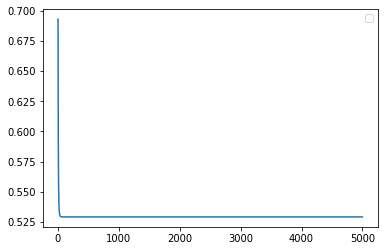

In [6]:
plt.plot(np.linspace(1,itera,itera),(J_his))
plt.legend()
plt.show()

(28,)


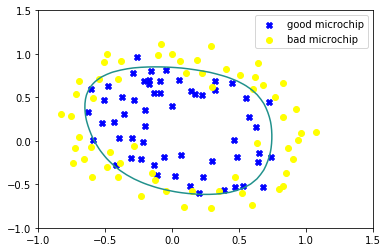

In [7]:
#boundary
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)
z = np.zeros((u.shape[0], v.shape[0]))
theta = theta_his[-1,:]
print(theta.shape)
#z = theta * x
for i in range(u.shape[0]):
    for j in range(v.shape[0]):
        z[i,j] = mapFeature(u[i],v[j],6) @ theta
z = np.transpose(z)
plt.scatter(x1[pos],x2[pos],label = 'good microchip', marker = 'X',
           color = 'blue')
plt.scatter(x1[neg],x2[neg],label = 'bad microchip', marker = 'o',
           color = 'yellow')
plt.contour(u, v, z, 0)
plt.legend()
plt.show()

In [8]:
def predict(theta,X):
    product = X @ np.transpose(theta)
    product = product.reshape(X.shape[0],1)
    p = 1/(1+np.exp(-(product)))
    p = np.where(p <= 0.5, 0, 1)
    return p
p = predict(theta_his[-1,:],X)
np.mean(np.float32((p == y)))

0.8305085